In [1]:
#importing the needed libraries and importing the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
df=pd.read_csv(r'C:\kamal\internship\Restaurant_Reviews.tsv',sep='\t')
df


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [3]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [4]:
df['Liked'].nunique()

2

In [5]:
df['Review'].nunique()

996

In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

<AxesSubplot:xlabel='Liked', ylabel='count'>

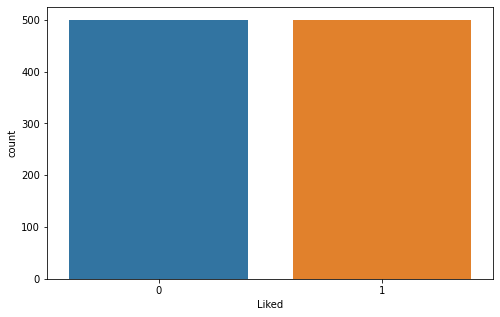

In [7]:
#visualizing the data
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked)

In [8]:
#defining the x and y values
y=df['Liked'].values
x=df['Review'].values


In [9]:
#spliting the datsets into training and testing models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [10]:
#viewing the sahpe of x_train
x_train.shape

(750,)

In [11]:
#viewing the sahpe of x_test
x_test.shape

(250,)

In [12]:
#viewing the sahpe of y_train
y_train.shape

(750,)

In [13]:
#viewing the sahpe of y_test
y_test.shape

(250,)

In [15]:
#importing the countvectorizer and removing the stopwords 
#
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)



<750x1510 sparse matrix of type '<class 'numpy.int64'>'
	with 3681 stored elements in Compressed Sparse Row format>

In [26]:
x_train_vect.toarray() #gives a sparse representation of numbers after converting from text 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
# Apply the ML algorithm to fit and predict 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_vect,y_train)
y_pred=model.predict(x_train_vect)
y_pred

array([-7.02565290e-07,  1.00000508e+00,  9.99994061e-01, -3.09348943e-06,
        6.28510178e-06,  1.77315103e-01,  1.00002389e+00,  1.00002506e+00,
       -2.00309930e-06,  1.00000299e+00, -3.72371920e-07,  1.33211298e+00,
        8.78405601e-01, -1.23706316e-01, -4.62898891e-06,  1.00000538e+00,
        9.99997168e-01,  1.86779660e-06,  9.99999220e-01, -1.60289297e-06,
        3.69988574e-06, -4.58086716e-06,  1.00000438e+00,  9.99999195e-01,
        1.51776121e-05,  1.00000073e+00,  1.00001070e+00,  9.99982391e-01,
        7.86979859e-06,  1.00000128e+00,  6.18655921e-07, -5.16728818e-06,
        9.99991312e-01,  1.00000045e+00,  1.00000430e+00, -1.90491405e-07,
        1.00000234e+00,  1.68521898e-06,  1.00000448e+00, -2.45091459e-06,
       -5.39702490e-06, -1.65809612e-06,  1.00000040e+00, -2.39374720e-09,
        3.68180305e-06, -3.52072443e-06, -3.66212034e-07, -1.45393038e-07,
        9.99999934e-01,  1.00000307e+00,  1.00000628e+00, -1.18587807e-06,
        9.95649143e-01,  

In [17]:
# evaluating the model accuracy by r2_score
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)

0.9763556511336849

In [25]:
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train_vect,y_train)

SVC()

In [26]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.72

In [32]:
#model.predict(['Wow... Loved this place.']) # it does not accept text data, we have convert it to numerical data using count vectorizer 

In [21]:
# PIPELINE (combines two estimators = svc+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output 
from sklearn.pipeline import make_pipeline 

model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train) 

y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.792

In [35]:
# APPLY ML MODEL (NAIVE BAYES)
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB() 
model3.fit(x_train_vect,y_train)
y_pred3 = model3.predict(x_test_vect)
y_pred3


array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.744

In [37]:
# PIPELINE WITH MultinomialNB 
# PIPELINE (combines two estimators = MultinomialNB+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output 
from sklearn.pipeline import make_pipeline 

model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train) 

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.784

In [39]:
# # ACCURACY SCORES FOR ALL 4 MODELS 
# SVC                       - 0.72
# SVC pipeline              - 0.792
# MultinomialNB             - 0.744
# MultinomialNB pipeline    - 0.784

In [40]:
# joblib is more advanced than pickle, we use joblib for pipeline models 
# pickle model is used if svc or nb has higher accuracy 

In [37]:
import joblib 
joblib.dump(model2,'good-bad.sav') #create a file for the best model to be used for predictions

['good-bad.sav']

In [38]:
import joblib 
text_model = joblib.load('good-bad.sav')   #reloading the created joblib model for predictions 
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [36]:

review=text_model.predict(['Wow... Loved this place.'])# we are using joblib model to predict the output 
print("The review is",review)

The review is [1]


In [ ]:
# SENTIMENT ANALYSIS  AND TWITTER SENTIMENTS 
# Sentiment analysis is the automated process of identifying and classifying subjective information in text data. This might be an opinion, a judgment, or a feeling about a particular topic or product feature.

# The most common type of sentiment analysis is ‘polarity detection’ and involves classifying statements as Positive, Negative or Neutral.
# Sentiment analysis uses Natural Language Processing (NLP) to make sense of human language, and machine learning to automatically deliver accurate results.

# Connect sentiment analysis tools directly to your social platforms , so you can monitor your tweets as and when they come in, 24/7, and get up-to-the-minute insights from your social mentions.
# Performing sentiment analysis on Twitter data involves five steps:

# Gather relevant Twitter data
# Clean your data using pre-processing techniques
# Create a sentiment analysis machine learning model
# Analyze your Twitter data using your sentiment analysis model
# Visualize the results of your Twitter sentiment analysis
